## Historic Redlining Maps

In this notebook, we've pulled geographic data on historically redlined neighborhoods in San Francisco from the [Mapping Inequality Project](https://dsl.richmond.edu/panorama/redlining/#loc=13/37.76/-122.445&city=san-francisco-ca). Although this notebook mainly recreates existing historic redlining maps, we hope to use these codes to create a layer in an interactive map as part of our final project.

In [2]:
import pandas as pd
import geopandas as gpd

In [5]:
redline=gpd.read_file('data/sfredlined.geojson')

In [6]:
redline.head()

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A1,A,{'1': 'This area consists of 35 irregularly-sh...,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755..."
1,None,A10,A,{'1': 'This area of 25 irregularly-shaped bloc...,"MULTIPOLYGON (((-122.46089 37.73566, -122.4610..."
2,None,A11,A,"{'1': 'This area, with the exception of the tw...","MULTIPOLYGON (((-122.45619 37.74046, -122.4565..."
3,None,A12,A,"{'1': 'This area, consisting of some 20 blocks...","MULTIPOLYGON (((-122.47154 37.73326, -122.4665..."
4,None,A13,A,{'1': 'This area of some 25 irregularly-shaped...,"MULTIPOLYGON (((-122.46102 37.73572, -122.4608..."


<AxesSubplot: >

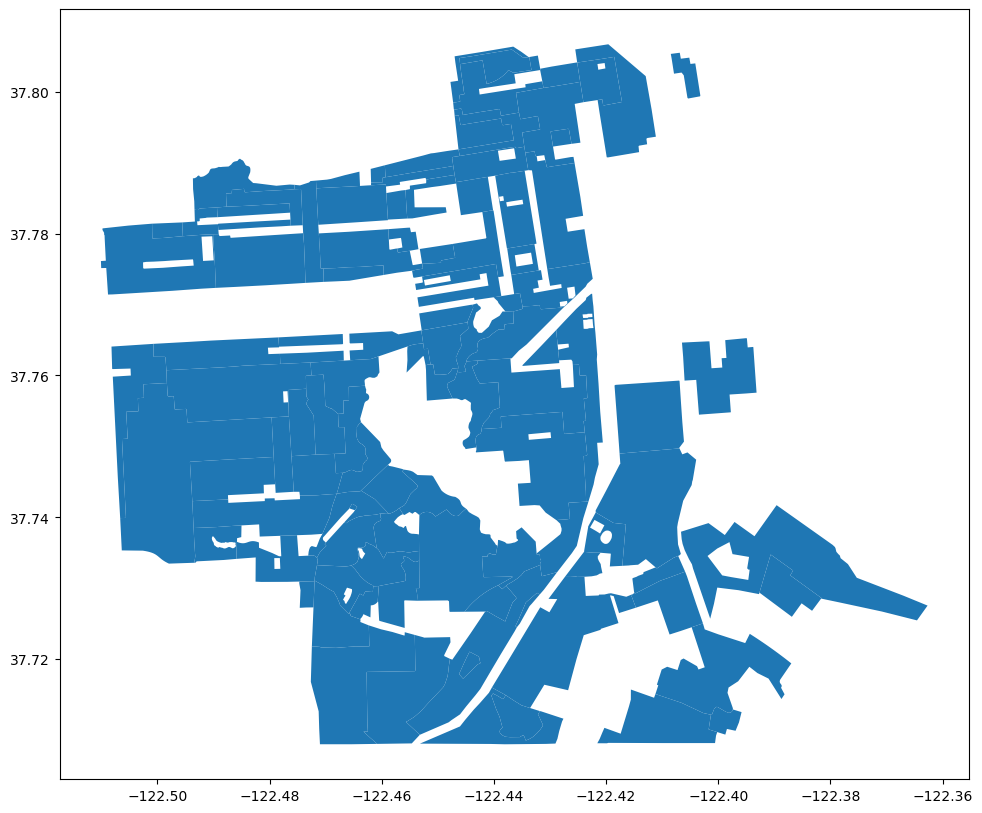

In [7]:
# plot it!
redline.plot(figsize=(12,10))

In [8]:
# tell me more about this dataset
redline.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   0 non-null      object  
 1   holc_id                95 non-null     object  
 2   holc_grade             97 non-null     object  
 3   area_description_data  97 non-null     object  
 4   geometry               97 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 3.9+ KB


In [9]:
# column name in brackets
# single column
redline['holc_grade'].describe()

count     97
unique     4
top        B
freq      36
Name: holc_grade, dtype: object

In [10]:
#sorting the entire data set by the HOLC grade
redline_sorted = redline.sort_values(by='holc_grade',ascending = True)
redline_sorted.head(5)

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A1,A,{'1': 'This area consists of 35 irregularly-sh...,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755..."
12,None,A9,A,"{'1': 'This area, consisting of some 20 irregu...","MULTIPOLYGON (((-122.45607 37.74673, -122.4563..."
11,None,A8,A,"{'1': 'This area, consisting of some 26 irregu...","MULTIPOLYGON (((-122.45875 37.74053, -122.4591..."
10,None,A7,A,"{'1': 'This area, consisting of some 22 irregu...","MULTIPOLYGON (((-122.45887 37.74742, -122.4605..."
8,None,A5,A,{'1': 'This neighborhood of some 20 blocks con...,"MULTIPOLYGON (((-122.44631 37.79187, -122.4469..."


In [11]:
#seeing how many areas fall within each grade, from A to D
redline['holc_grade'].value_counts()

B    36
C    31
D    17
A    13
Name: holc_grade, dtype: int64

In [12]:
redline.query("holc_grade == 'D'")

,name,holc_id,holc_grade,area_description_data,geometry
78,None,D1,D,{'1': 'This area of some 20 blocks occupies a ...,"MULTIPOLYGON (((-122.44014 37.78329, -122.4419..."
79,None,D10,D,{'1': 'This area of 25 blocks is known as Holl...,"MULTIPOLYGON (((-122.42184 37.74070, -122.4186..."
80,None,D11,D,"{'1': 'This large, irregularly-shaped area of ...","MULTIPOLYGON (((-122.43538 37.72502, -122.4359..."
81,None,D12,D,{'1': 'This area of some 75 blocks is 95% buil...,"MULTIPOLYGON (((-122.41086 37.75907, -122.4069..."
82,None,D13,D,{'1': 'This is a large area of some 150 blocks...,"MULTIPOLYGON (((-122.41759 37.74899, -122.4069..."
83,None,D14,D,{'1': 'This area contains some 40 blocks and i...,"MULTIPOLYGON (((-122.41119 37.71510, -122.4065..."
84,None,D15,D,{'1': 'This area of some 60 blocks is located ...,"MULTIPOLYGON (((-122.40646 37.76463, -122.4019..."
85,None,D16,D,{'1': 'This area of some 75 blocks contains nu...,"MULTIPOLYGON (((-122.38402 37.73860, -122.3796..."
86,None,D17,D,{'1': 'The southern part of this area of appro...,"MULTIPOLYGON (((-122.39823 37.71247, -122.3987..."
87,None,D2,D,{'1': 'This area of 36 blocks occupies a level...,"MULTIPOLYGON (((-122.43867 37.77118, -122.4400..."


In [13]:
# now let's create a dataframe with a specific subset of the columns that I identified earlier
redline = redline[['holc_grade', 'geometry']]
redline.head()

,holc_grade,geometry
0,A,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755..."
1,A,"MULTIPOLYGON (((-122.46089 37.73566, -122.4610..."
2,A,"MULTIPOLYGON (((-122.45619 37.74046, -122.4565..."
3,A,"MULTIPOLYGON (((-122.47154 37.73326, -122.4665..."
4,A,"MULTIPOLYGON (((-122.46102 37.73572, -122.4608..."


## Making Maps

(-122.517426, -122.35530800000001, 37.703080549999996, 37.81161645)

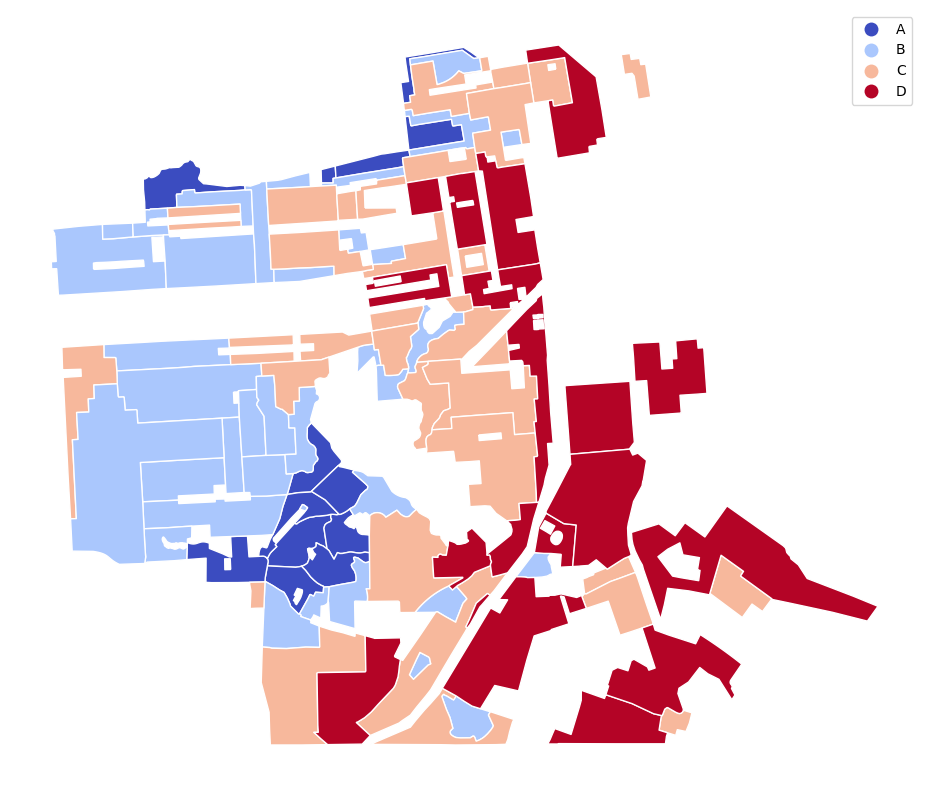

In [14]:
ax1 = redline.plot(
        column='holc_grade', 
        figsize=(12,10),
        edgecolor='white',
        legend=True,
        cmap='coolwarm',
        )
ax1.axis('off')

In [15]:
#creating a color dictionary to control the color coding of the map by HOLC Grade
color_dict = {'A': 'green',
              'B': 'blue',
              'C': 'yellow',
              'D': 'red'}

In [17]:
redline['Colors'] = redline['holc_grade'].map(color_dict)

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
redline.sample(5)

,holc_grade,geometry,Colors
8,A,"MULTIPOLYGON (((-122.44631 37.79187, -122.4469...",green
95,C,"MULTIPOLYGON (((-122.47350 37.72729, -122.4746...",yellow
68,C,"MULTIPOLYGON (((-122.40275 37.72511, -122.4029...",yellow
90,D,"MULTIPOLYGON (((-122.42151 37.79882, -122.4206...",red
22,B,"MULTIPOLYGON (((-122.47509 37.73748, -122.4780...",blue


(-122.517426, -122.35530800000001, 37.703080549999996, 37.81161645)

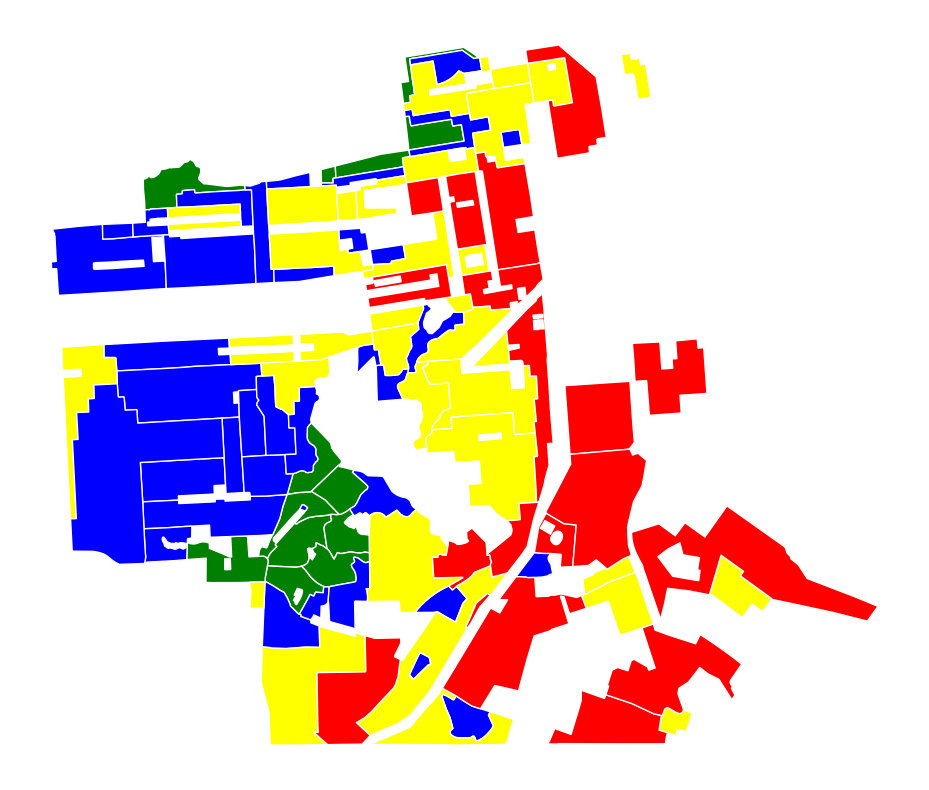

In [19]:
ax = redline.plot(color = redline['Colors'],
                figsize=(12,10),
                edgecolor='white',
                legend=True
                 )
ax.axis('off')

In [20]:
redline.explore()

In [24]:
# making the interactive map a bit prettier and easier to understand, complete with a legend
redline.explore(
     column="holc_grade", # make choropleth based on "BoroName" column
     tooltip="holc_grade", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="coolwarm", # use "Set1" matplotlib colormap
     style_kwds=dict(color="white") # use black outline
    )

## Mapping Redlining to (2020) Census Tract Boundaries

In [26]:
# import libraries
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

In [27]:
# import the data into a new variable
ct = gpd.read_file("https://raw.githubusercontent.com/americanpanorama/Census_HOLC_Research/main/2020_Census_Tracts/Tracts_2020_HOLC.geojson")

In [28]:
ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42074 entries, 0 to 42073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          42074 non-null  int64   
 1   GISJOIN           42074 non-null  object  
 2   neighborho        42074 non-null  int64   
 3   SUM_Perc          42074 non-null  float64 
 4   FIRST_holc_grade  42074 non-null  object  
 5   MAX_state         42074 non-null  object  
 6   MAX_city          42074 non-null  object  
 7   Shape_Length      42074 non-null  float64 
 8   Shape_Area        42074 non-null  float64 
 9   geometry          42074 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 3.2+ MB


In [29]:
ct.head(3)

,OBJECTID,GISJOIN,neighborho,SUM_Perc,FIRST_holc_grade,MAX_state,MAX_city,Shape_Length,Shape_Area,geometry
0,1,G0100730000100,180,0.092969,D,AL,Birmingham,3336.386272,7.095820e+05,"POLYGON ((-86.71213 33.59389, -86.71218 33.594..."
1,2,G0100730000100,181,0.161693,D,AL,Birmingham,7731.380924,1.234060e+06,"POLYGON ((-86.72188 33.58805, -86.72322 33.589..."
2,3,G0100730000100,182,0.170326,D,AL,Birmingham,6111.241095,1.300062e+06,"POLYGON ((-86.72644 33.56609, -86.73380 33.569..."


In [30]:
ct.query("MAX_city == 'San Francisco'")

,OBJECTID,GISJOIN,neighborho,SUM_Perc,FIRST_holc_grade,MAX_state,MAX_city,Shape_Length,Shape_Area,geometry
4857,4858,G0600750010101,737,0.000273,D,CA,San Francisco,66.821534,190.019325,"POLYGON ((-122.41853 37.80596, -122.41877 37.8..."
4858,4859,G0600750010101,745,0.023125,C,CA,San Francisco,755.952555,16116.899020,"POLYGON ((-122.40515 37.80477, -122.40516 37.8..."
4859,4860,G0600750010201,730,0.005193,C,CA,San Francisco,439.611407,970.438770,"POLYGON ((-122.42461 37.80138, -122.42465 37.8..."
4860,4861,G0600750010201,732,0.991968,C,CA,San Francisco,1806.228464,185369.402308,"POLYGON ((-122.41816 37.80314, -122.41865 37.8..."
4861,4862,G0600750010201,733,0.002839,C,CA,San Francisco,213.541662,530.455183,"POLYGON ((-122.42479 37.80228, -122.42485 37.8..."
...,...,...,...,...,...,...,...,...,...,...
5467,5468,G0600810600402,790,0.005356,C,CA,San Francisco,520.293627,2155.063525,"POLYGON ((-122.44976 37.70822, -122.45017 37.7..."
5468,5469,G0600810600701,788,0.029118,C,CA,San Francisco,1486.619592,15236.603137,"POLYGON ((-122.46104 37.70824, -122.46129 37.7..."
5469,5470,G0600810600701,789,0.015979,D,CA,San Francisco,1151.050874,8360.211548,"POLYGON ((-122.45452 37.70824, -122.45520 37.7..."
5470,5471,G0600810600701,790,0.000647,C,CA,San Francisco,125.541397,338.527576,"POLYGON ((-122.45248 37.70815, -122.45284 37.7..."


<AxesSubplot: >

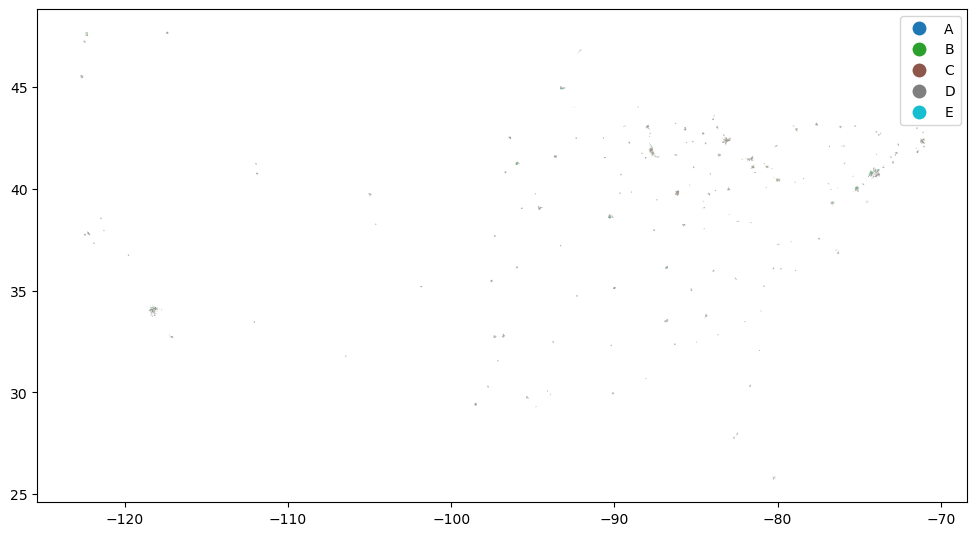

In [31]:
#generate a choropleth map based on the merged dataset 
ct.plot(figsize=(12,10),
                 column='FIRST_holc_grade',
                 legend=True)

Although it's hard to tell, this is actually a map of the entire country! All the small, faint dots represent redlining in different cities - but we just want to map redlining by census tract in San Francisco. 

Let's try a different route: 

In [32]:
# create a list of routes
cities = ["San Francisco"]

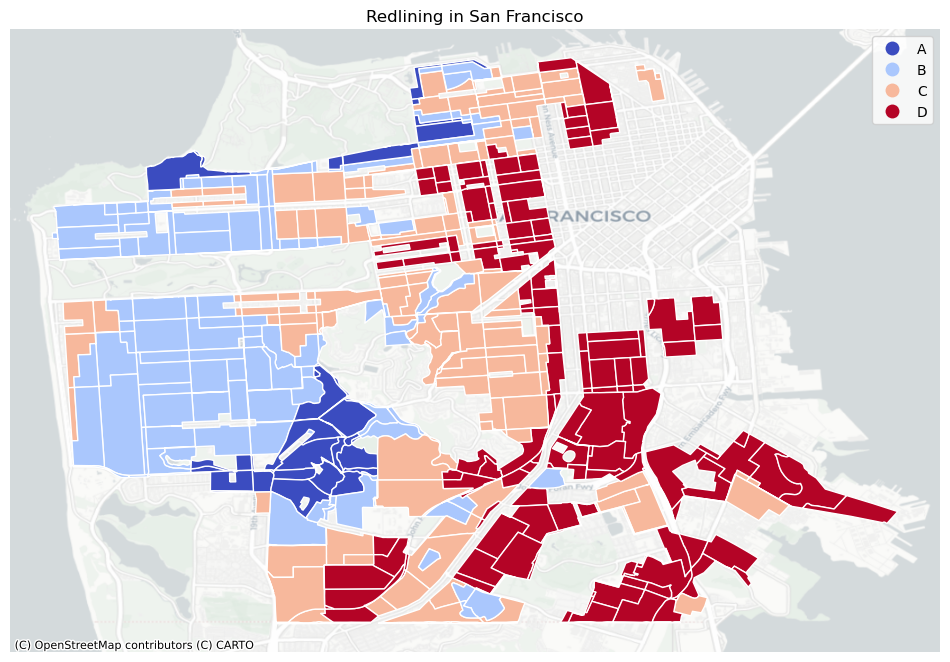

In [33]:
for MAX_city in cities:

    # map it
    fig, ax = plt.subplots(figsize=(12,10))

    # map options: notice the query to filter by individual city
    ct[ct.MAX_city == MAX_city].plot(column = 'FIRST_holc_grade',legend=True,
  edgecolor='white',cmap = 'coolwarm',ax=ax)
    # no axes
    ax.axis('off')

    # title
    ax.set_title('Redlining in San Francisco')
    
    ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron, crs=4326)

In [34]:
ct[ct.MAX_city == MAX_city].explore(
    column="FIRST_holc_grade", # make choropleth based on "BoroName" column
     tooltip="GISJOIN", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="coolwarm", # use "Set1" matplotlib colormap
     style_kwds=dict(color="white") # use black outline
    )